<a href="https://colab.research.google.com/github/KimJunGu9/3.data_analysis/blob/main/5_%EC%87%BC%ED%95%91%EB%AA%B0_%EA%B3%A0%EA%B0%9D%EC%A3%BC%EB%AC%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 고객 주문 데이터 파악**

### **1-1. 데이터 셋**
* 온라인 리테일 사이트의 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건의 데이터

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
retail = pd.read_csv('OnlineRetail.csv')

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 컬럼이름 

retail.columns
# InvoiceNo : 주문번호
# StockCode : 아이템 아이디
# Description : 상품 설명
# Quantity : 상품 주문 수량
# InvoiceDate : 주문 시간
# UnitPrice : 상품 가격
# CustomerID : 고객 아이디
# Country 고객 거주 지역(국가)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# 각 필드당 null이 몇개 있는지 확인  // isnull().sum()

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
 # 비회원을 제거

retail = retail[pd.notnull(retail['CustomerID'])]

# notnull : null값이 아닌 것만 가져오겠다라는 뜻

In [ ]:
len(retail)  # 회원

406829

In [ ]:
# 구입 수량이 0이상, 구입 가격이 0이상인 데이터만 저장

retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] >0 ]

In [ ]:
len(retail) # 회원

397884

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
# 필드를 하나 추기하가(파생변수 만들기)
# 고객의 총 지출비용(CheckoutPrice) = 수량 * 가격

retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']  # checkoutprice 변수를 만들어서 unitprice * quantity를 해서 하나의 필드를 만듦
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
retail.to_csv('OnlineRetailClean.csv')

In [ ]:
dtypes = { 'UnitPrice':np.float32, 'CustomerID':np.int32, 'Quantity':np.int32 } # dtypes(변수)이름은 중요하지 않음 그냥 아무렇게나 써도 괜찮
retail = pd.read_csv('OnlineRetailClean.csv', dtype=dtypes) # 읽어올때 타입을 내 마음대로 정해서 읽어올 수 있음

# customerID는 굳이 소숫점사용하는 64비트짜리를 사용할 필요가 없음(메모리줄이기 위해)
# 넘파이에 넣은 이유는 행렬계산이나 수식계산할때 속도가 더 빠르기 때문에 바꿈

In [ ]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float32
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 25.8+ MB


### **1-2. 날짜 타입 데이터 변환**
* 문자열로 데이터를 로딩하는 것보다 datatime 타입으로 로딩하는 것이 날짜 분석 및 계산에 용이

In [ ]:
# infer_datetime_format=True : 날짜 시간 포멧을 추정해서 파싱(분석)

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


In [ ]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# 전체 매출

total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [ ]:
# 국가별 매출 1

rev_by_countries = retail.groupby('Country').sum()
rev_by_countries

,Unnamed: 0,InvoiceNo,Quantity,UnitPrice,CustomerID,CheckoutPrice
Country,,,,,,
Australia,265381714,657415628,83901.0,3.612500e+03,1.472127e+07,138521.310
Austria,118301156,223822318,4881.0,1.693900e+03,4.982601e+06,10198.680
Bahrain,3144388,9397437,260.0,7.895000e+01,2.100270e+05,548.400
Belgium,561892335,1138462862,23237.0,7.372850e+03,2.524670e+07,41196.340
Brazil,5034064,17606432,356.0,1.426000e+02,4.086080e+05,1143.600
Canada,36331486,84252636,2763.0,9.105800e+02,2.615483e+06,3666.380
Channel Islands,190820428,417972473,9491.0,3.389650e+03,1.113834e+07,20450.440
Cyprus,145370145,341888568,6361.0,3.506180e+03,7.616904e+06,13590.380
Czech Republic,5389080,13876340,671.0,7.827000e+01,3.195250e+05,826.740


In [ ]:
# 국가별 매출 2

rev_by_countries = retail.groupby('Country').sum() ['CheckoutPrice']
rev_by_countries

Country
Australia                138521.310
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265545.900
European Community         1300.250
Finland                   22546.080
France                   209024.050
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33439.890
RSA                 

In [ ]:
# 국가별 매출 3  and 오름차순으로

rev_by_countries = retail.groupby('Country').sum() ['CheckoutPrice'].sort_values() 
# checkoutprice를 sort_values해서  ->  checkoutprice만 보이고 sort_values해서 오름차순으로 
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

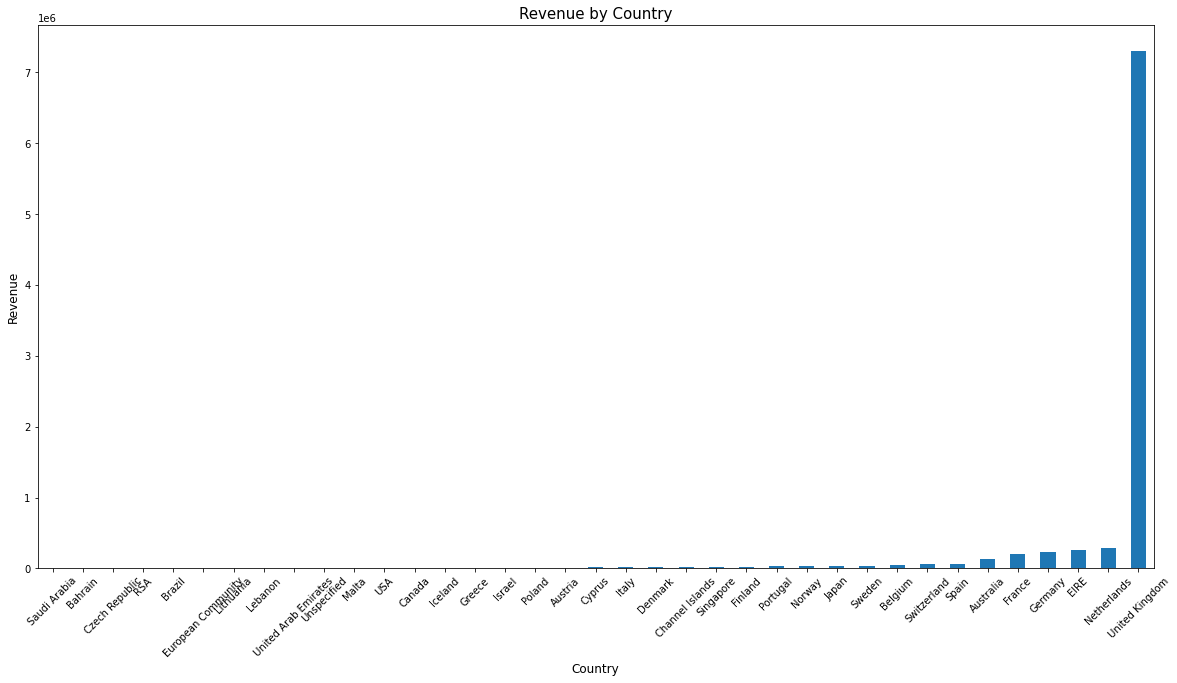

In [ ]:
plot = rev_by_countries.plot(kind='bar', figsize=(20, 10)) # 종류는 bar형태, 사이즈는 20,10
plot.set_xlabel('Country', fontsize=12) # x축 이름
plot.set_ylabel('Revenue', fontsize=12) # y축 이름
plot.set_title('Revenue by Country', fontsize=15) # 타이틀 이름
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45) # x축에있는 라벨과 기울기

In [ ]:
# unnamed는 인덱스가 아니라 필드인데 꼴보기 싫으니까 삭제하기

retail = retail.drop('Unnamed: 0', axis=1)

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# 전체 매출을 100으로 놨을때 각 나라별로 전체 매출의 몇 프로인지 확인하고 싶다면

rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

# **2.월별 매출 구하기**

In [ ]:
retail['InvoiceDate'].sort_values(ascending=False)

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [ ]:
def extract_month(date):  # 2011-12-09 12:50:00, 2011-01-01 08:26:00
  month = str(date.month) # 2011-12-09 12:50:00 -> 12,   2011-01-01 08:26:00 -> 1  # date의 month를 가져다가 string으로 뽑을것 
  if date.month < 10:  # 두자리일 경우는 그냥 냅두고 두자리가 아닐경우 0을 붙인다.
    month = '0' + month
  return str(date.year) + month # 2011-12-09 12:50:00 -> 201112,   2011-01-01 08:26:00 -> 201101

In [ ]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

In [ ]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45): # figsize랑 rotation을 미리 쓰면 나중에 안써도 된다.
  plot = df.plot(kind='bar', figsize=figsize)
  plot.set_xlabel(xlabel, fontsize=12) # x축 이름
  plot.set_ylabel(ylabel, fontsize=12) # y축 이름
  plot.set_title(title, fontsize=15) # 타이틀 이름
  plot.set_xticklabels(labels=df.index, rotation=rotation) # x축에있는 라벨

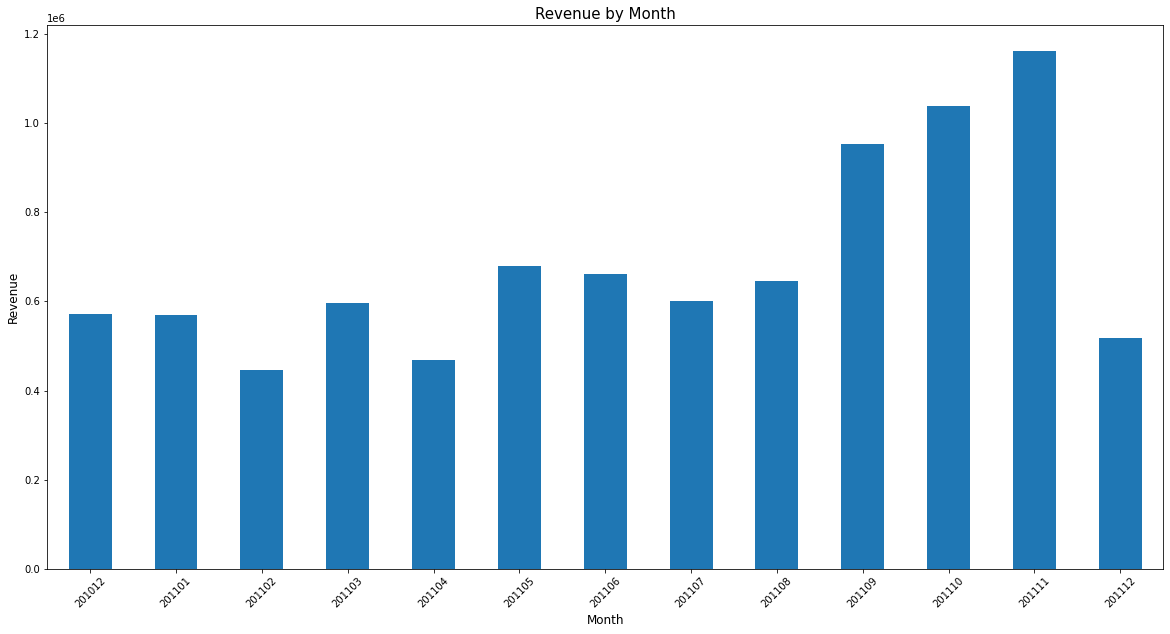

In [ ]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

# df = rev_by_month
# xlabel = 'Month'
# ylabel = 'Revenue'
# title = 'Revenue by Month'

# **3. 요일별 매출 구하기**

In [ ]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
# 날짜에서 요일을 뽑아내는 것은 date.dayofweek로 하면 된다.
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

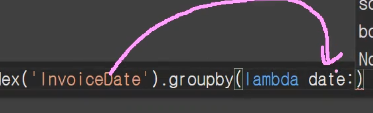

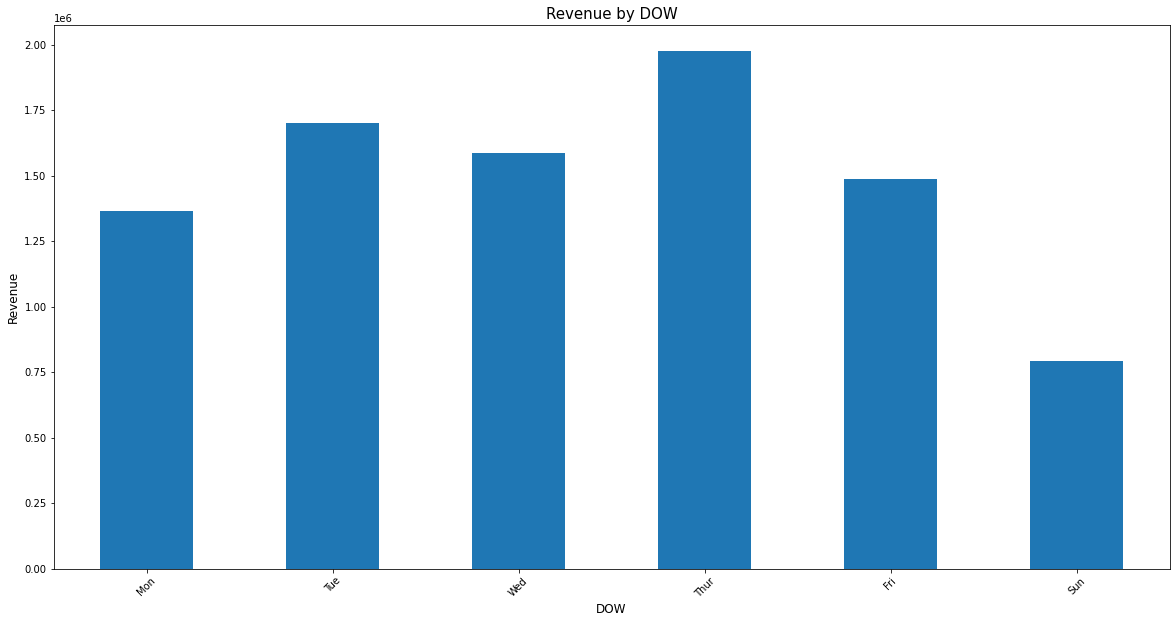

In [ ]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

# **4. 시간대별 매출**

In [ ]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

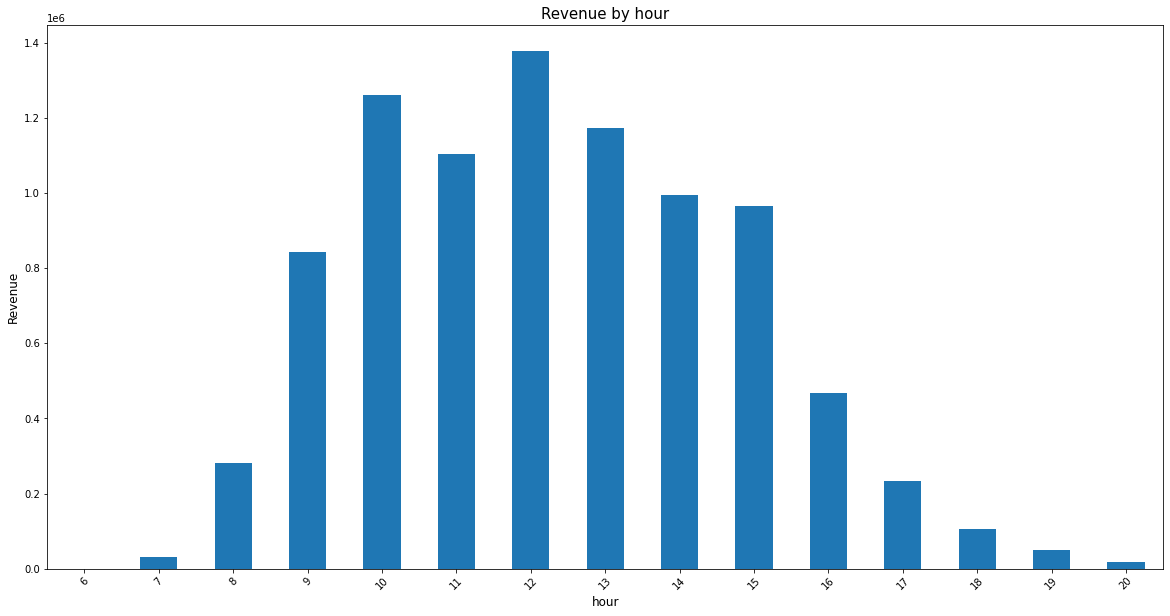

In [ ]:
plot_bar(rev_by_hour, 'hour', 'Revenue', 'Revenue by hour')

# **5. 매출 데이터로부터 Insight**

* 전체 매출의 약 82%가 UK에서 발생
* 11년도 가장 많은 매출이 발생한 달은 11월
* 매출은 꾸준히 급성장(12월 데이터는 모두 포함되지 않음)
* 일주일 중 목요일까지는 성장세, 이후로 하락(토요일에는 영업을 하지 않음)
* 6시에 주문이 시작, 12시까지는 성장세, 오후 3시이후는 급락

# **6. 제품별 metrics**

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Top 10 판매 제품(Quantity)

top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]

# 그룹을 'stockcode'로 맺고 'quantity'의 합을 함.
# sort_values(ascending=False)해서 내림차순을 함. 
# [:10]은 0부터 10미만이니까 top10을 보여줌

top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int32

In [ ]:
# Top 10 매출 제품(CheckoutPrice)

top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

# **7. 우수 고객**

In [ ]:
# 구매 횟수 기준(Quantity)

vip = retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)[:10]
# 횟수가 많은것을 따져야하니까 count()로 셈. 근데 필드는 quantity
print(vip)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64


In [ ]:
# 지불 금액 기준(CheckoutPrice)

vvip = retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
print(vvip)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64


# **8. 사용자 기준으로 최초 구매한 월 연산하기**

In [ ]:
from datetime import datetime

def get_month_as_datetime(date): # 2011-12-09 12:50:00
  return datetime(date.year, date.month, 1) # 2011-12-01

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [ ]:
month_group = retail.groupby('CustomerID')['Month']
# transform() : 데이터프레임에 그룹단위 통계를 집계
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


In [ ]:
# 각 구매가 최초 구매로 부터 얼마의 월이 지났는지 연산

retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4
